# Some instructions

In [1]:
# This lets us change the eb.py file and run the notebook simultaenously,
# without having to reload the notebook every time!
% load_ext autoreload
% autoreload 2

In [2]:
import lightkurve as lk
from chromo import eb
from chromo.utils import background_correct

In [104]:
# Grab an object
tic = 'Zeta Phe'

In [105]:
sr = lk.search_tesscut(tic)

In [106]:
sr

SearchResult containing 1 data products.

target_name productFilename        description         distance
----------- --------------- -------------------------- --------
   Zeta Phe             n/a TESS FFI Cutout (sector 2)      0.0

In [107]:
# Download an FFI cut out!
raw_tpf = sr[0].download(cutout_size=[30, 30], quality_bitmask=None)[:-20]
k = ~((raw_tpf.time > 1346) & (raw_tpf.time < 1350))
raw_tpf = raw_tpf[k]
raw_tpf = raw_tpf[(raw_tpf.to_lightcurve().flux > 0)]

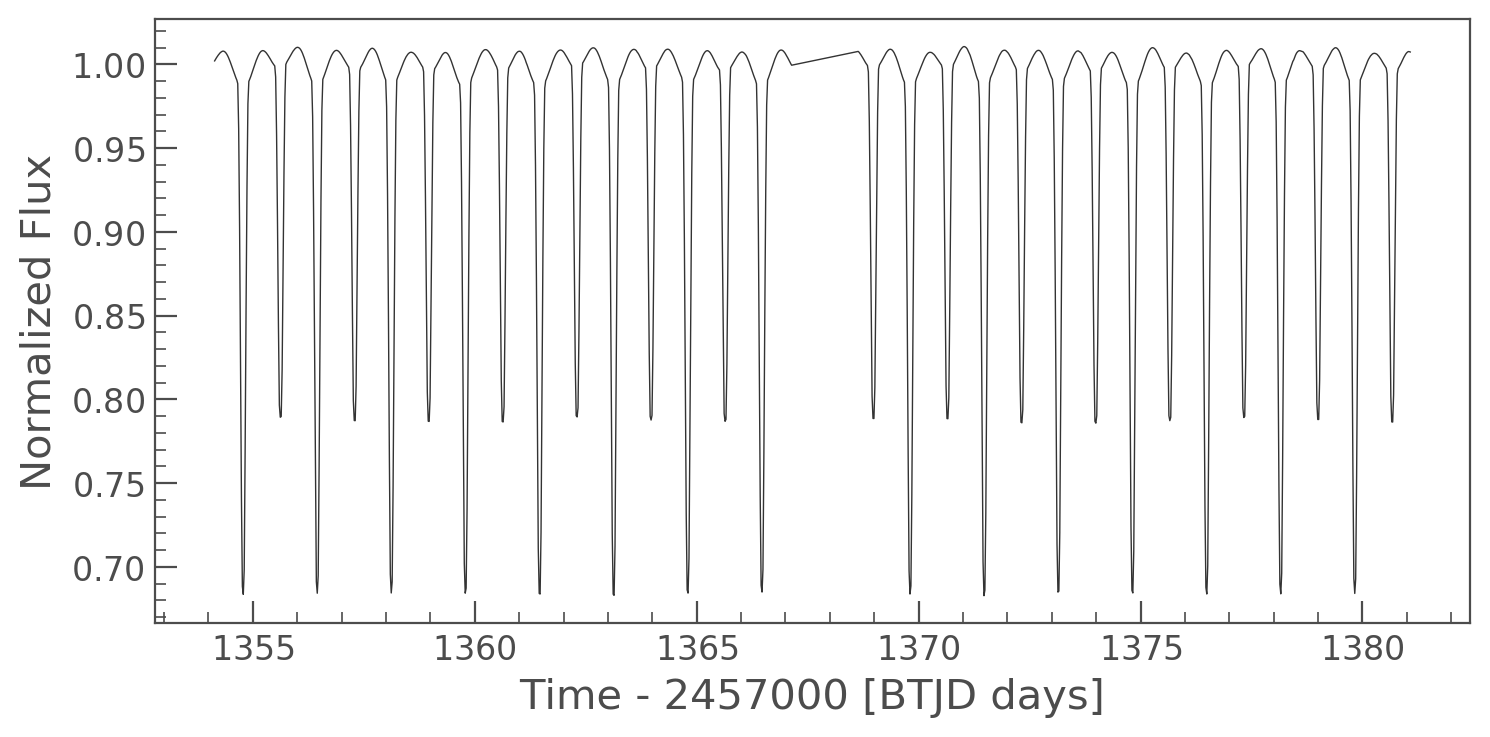

In [108]:
# Take a look!
lc = background_correct(raw_tpf).to_lightcurve()
lc.plot()

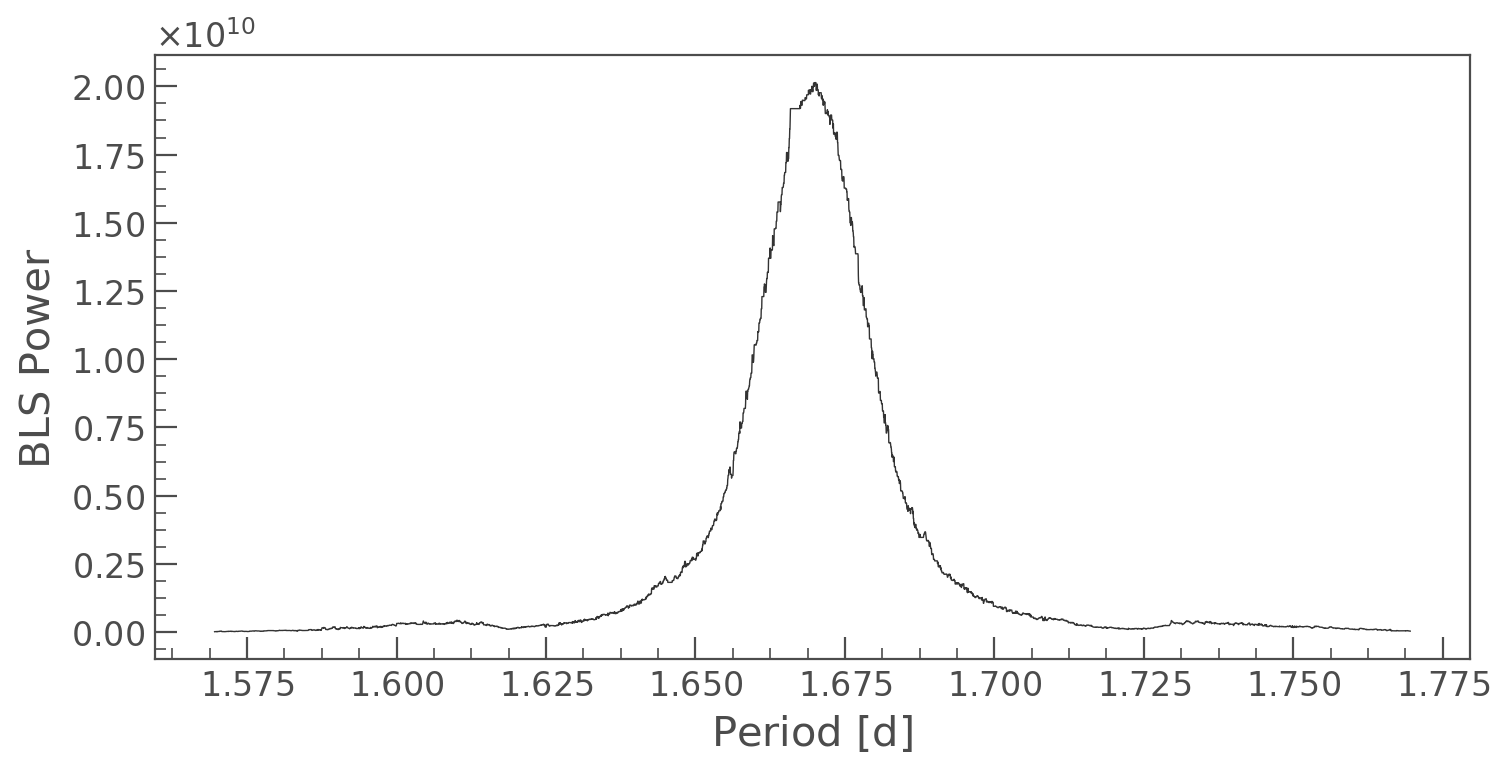

In [111]:
# Find the period and t0 using a BLS!
p = lc.to_periodogram('bls', duration=0.1, minimum_period=1, maximum_period=20)
period = p.period_at_max_power.value
p = lc.to_periodogram('bls', duration=0.1, minimum_period=period-0.1, maximum_period=period+0.1, frequency_factor=0.1)
p.plot()
period, t0 = p.period_at_max_power.value, p.transit_time_at_max_power

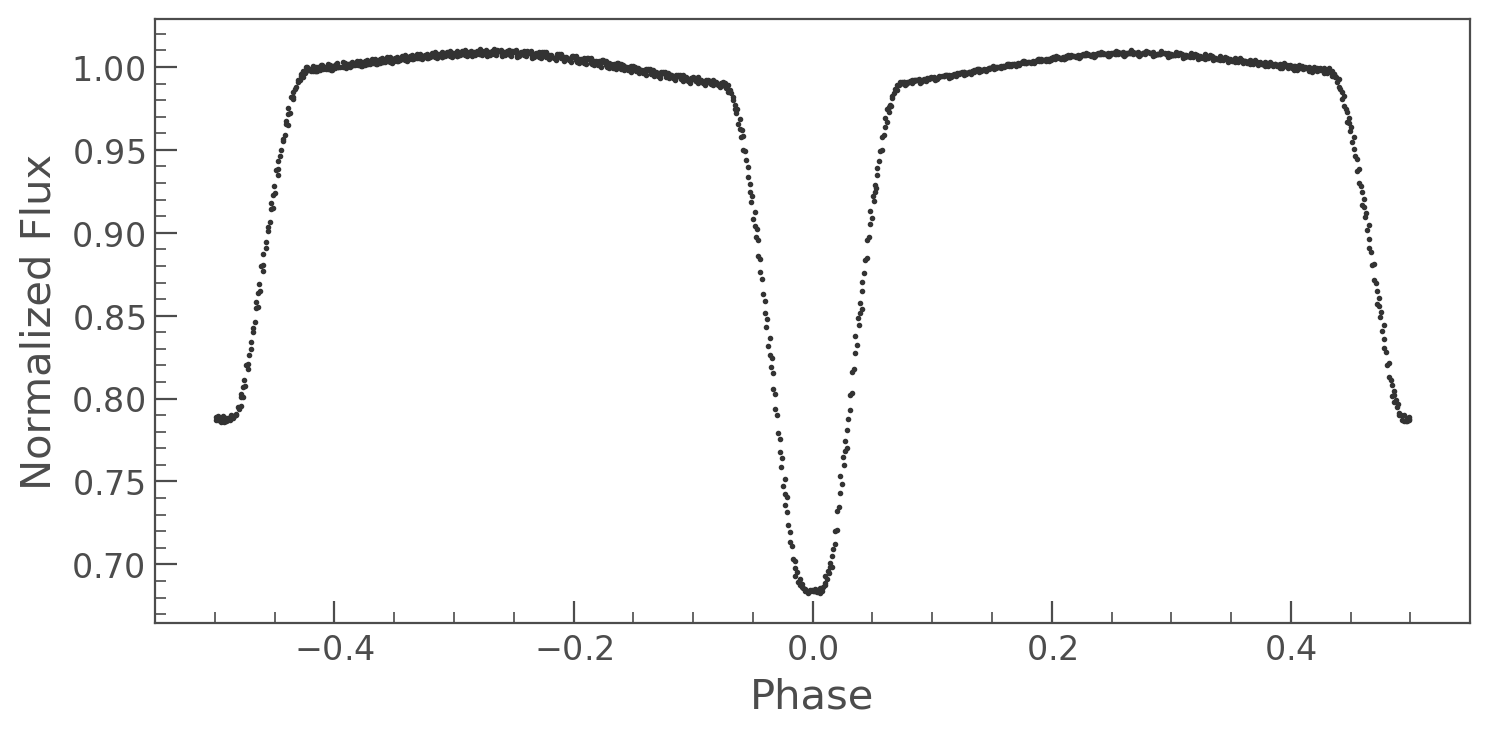

In [112]:
# Fold the light curve and take another look!
f = lc.fold(period, t0)
f.scatter()

In [ ]:
# Use Chromo to analyze! This will make movies in your current directory!
eb.analyze(raw_tpf, period, t0, name='{}{}'.format(tic, '_sector{}'.format(raw_tpf.sector)), nb=100);

In [96]:
plt.plot(eb_model);plt.plot(clc.flux);plt.plot(clc.flux/eb_model);plt.show();

NameError: name 'plt' is not defined

In [89]:
interp1d()

scipy.interpolate.interpolate.interp1d